In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn.objects as so
import seaborn as sns 
from scipy import stats
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
import plotly.express as px

In [2]:
# First Read Each data from AirBnN
listing = pd.read_csv('data/listing.csv', index_col='Unnamed: 0')
neighbourhood = pd.read_csv('data/neighbourhood.csv', index_col='Unnamed: 0')
reviews = pd.read_csv('data/reviews.csv', index_col='Unnamed: 0')

In [5]:
#identify kind of Data 
listing.info()
neighbourhood.info()
reviews.info()

#rename coloumn name 
reviews.rename(columns={'listing_id':'id'}, inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4161 entries, 0 to 4160
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4161 non-null   int64  
 1   name              4161 non-null   object 
 2   host_id           4161 non-null   int64  
 3   host_name         4161 non-null   object 
 4   neighbourhood     4161 non-null   object 
 5   latitude          4161 non-null   float64
 6   longitude         4161 non-null   float64
 7   room_type         4161 non-null   object 
 8   price             4161 non-null   int64  
 9   minimum_nights    4161 non-null   int64  
 10  availability_365  4161 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 390.1+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 55 entries, 0 to 54
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   neighbourhood

In [8]:
# merging Neighbourhood to listing 
df = listing.merge(neighbourhood, how='left', on='neighbourhood')
df.info() # All Data is NoNull 
print("="*50)
#Merging Listing to Reviews
df = reviews.merge(df, how='left', on='id')
df.info() # All Data is NoNull 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4161 entries, 0 to 4160
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   4161 non-null   int64  
 1   name                 4161 non-null   object 
 2   host_id              4161 non-null   int64  
 3   host_name            4161 non-null   object 
 4   neighbourhood        4161 non-null   object 
 5   latitude             4161 non-null   float64
 6   longitude            4161 non-null   float64
 7   room_type            4161 non-null   object 
 8   price                4161 non-null   int64  
 9   minimum_nights       4161 non-null   int64  
 10  availability_365     4161 non-null   int64  
 11  neighbourhood_group  4161 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 422.6+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49695 entries, 0 to 49694
Data columns (total 13 columns):
 #   Column         

In [9]:
#Converting date from object to datetime64
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49695 entries, 0 to 49694
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   49695 non-null  int64         
 1   date                 49695 non-null  datetime64[ns]
 2   name                 49695 non-null  object        
 3   host_id              49695 non-null  int64         
 4   host_name            49695 non-null  object        
 5   neighbourhood        49695 non-null  object        
 6   latitude             49695 non-null  float64       
 7   longitude            49695 non-null  float64       
 8   room_type            49695 non-null  object        
 9   price                49695 non-null  int64         
 10  minimum_nights       49695 non-null  int64         
 11  availability_365     49695 non-null  int64         
 12  neighbourhood_group  49695 non-null  object        
dtypes: datetime64[ns](1), float64(2

In [10]:
#sort value 
df = df.sort_values('date')
df.head()

,id,date,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,availability_365,neighbourhood_group
2371,5827998,2018-01-01,The Lily Room,30080617,Eddie,Tampines,1.34460,103.96223,Private room,60,92,59,East Region
994,2387715,2018-01-01,"City Private room 2-pax near MRT, shared toilet",12067440,Peggy,Kallang,1.31170,103.86028,Private room,98,1,355,Central Region
2495,5889741,2018-01-01,Entire Home in the Heart of City,5365111,Y,Rochor,1.30153,103.85344,Entire home/apt,173,92,121,Central Region
6129,12484261,2018-01-01,"City room 5mins to Haji, near Suntec/MBS/Merlion",3234859,Sk,Rochor,1.30249,103.86035,Private room,64,92,0,Central Region
9492,18674998,2018-01-01,Cozy Premium Studio In Orchard Road (300 sqft),111065775,Joyce,River Valley,1.29765,103.83627,Hotel room,200,6,345,Central Region


<Axes: xlabel='price', ylabel='room_type'>

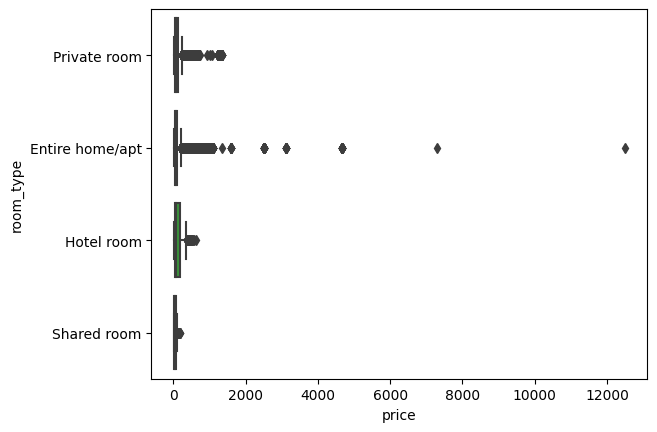

In [11]:
#Quantile Check 
sns.boxplot(data=df, x="price", y="room_type")

In [13]:
# Selection out of box Quantile
quantile_low = df['price'].quantile(0.20)
quantile_high = df['price'].quantile(0.80)

df_filtered = df[(df["price"] < quantile_high) & (df["price"] > quantile_low)]
df_filtered.info()
#Seleksi Data
df_filtered['year'] = df['date'].dt.to_period('Y')
df_filtered = df_filtered[['date','room_type','price', 'year']]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28379 entries, 2371 to 1221
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   28379 non-null  int64         
 1   date                 28379 non-null  datetime64[ns]
 2   name                 28379 non-null  object        
 3   host_id              28379 non-null  int64         
 4   host_name            28379 non-null  object        
 5   neighbourhood        28379 non-null  object        
 6   latitude             28379 non-null  float64       
 7   longitude            28379 non-null  float64       
 8   room_type            28379 non-null  object        
 9   price                28379 non-null  int64         
 10  minimum_nights       28379 non-null  int64         
 11  availability_365     28379 non-null  int64         
 12  neighbourhood_group  28379 non-null  object        
dtypes: datetime64[ns](1), float64

/tmp/ipykernel_10481/424930992.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df['date'].dt.to_period('Y')


<Axes: xlabel='room_type', ylabel='price'>

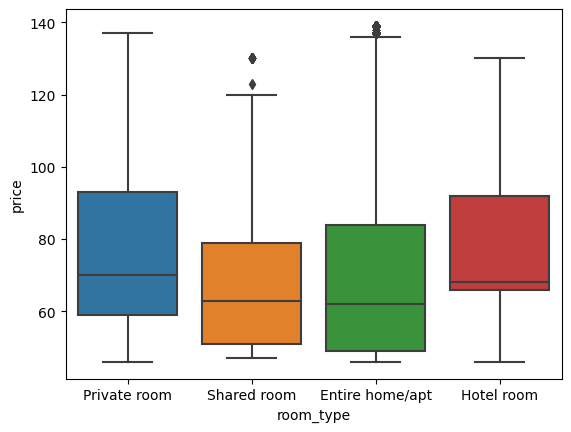

In [14]:
sns.boxplot(data=df_filtered, x="room_type", y="price")

In [15]:
#Grouping Data 
df_group = df_filtered.groupby(by=['year','room_type'],as_index=True).mean().reset_index()
df_group = df_group.sort_values(['room_type','year','price'])
df_group.head()

/tmp/ipykernel_10481/711491942.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_group = df_filtered.groupby(by=['year','room_type'],as_index=True).mean().reset_index()


,year,room_type,price
0,2018,Entire home/apt,81.668778
4,2019,Entire home/apt,72.059093
8,2020,Entire home/apt,70.234812
12,2021,Entire home/apt,67.394894
16,2022,Entire home/apt,66.816012


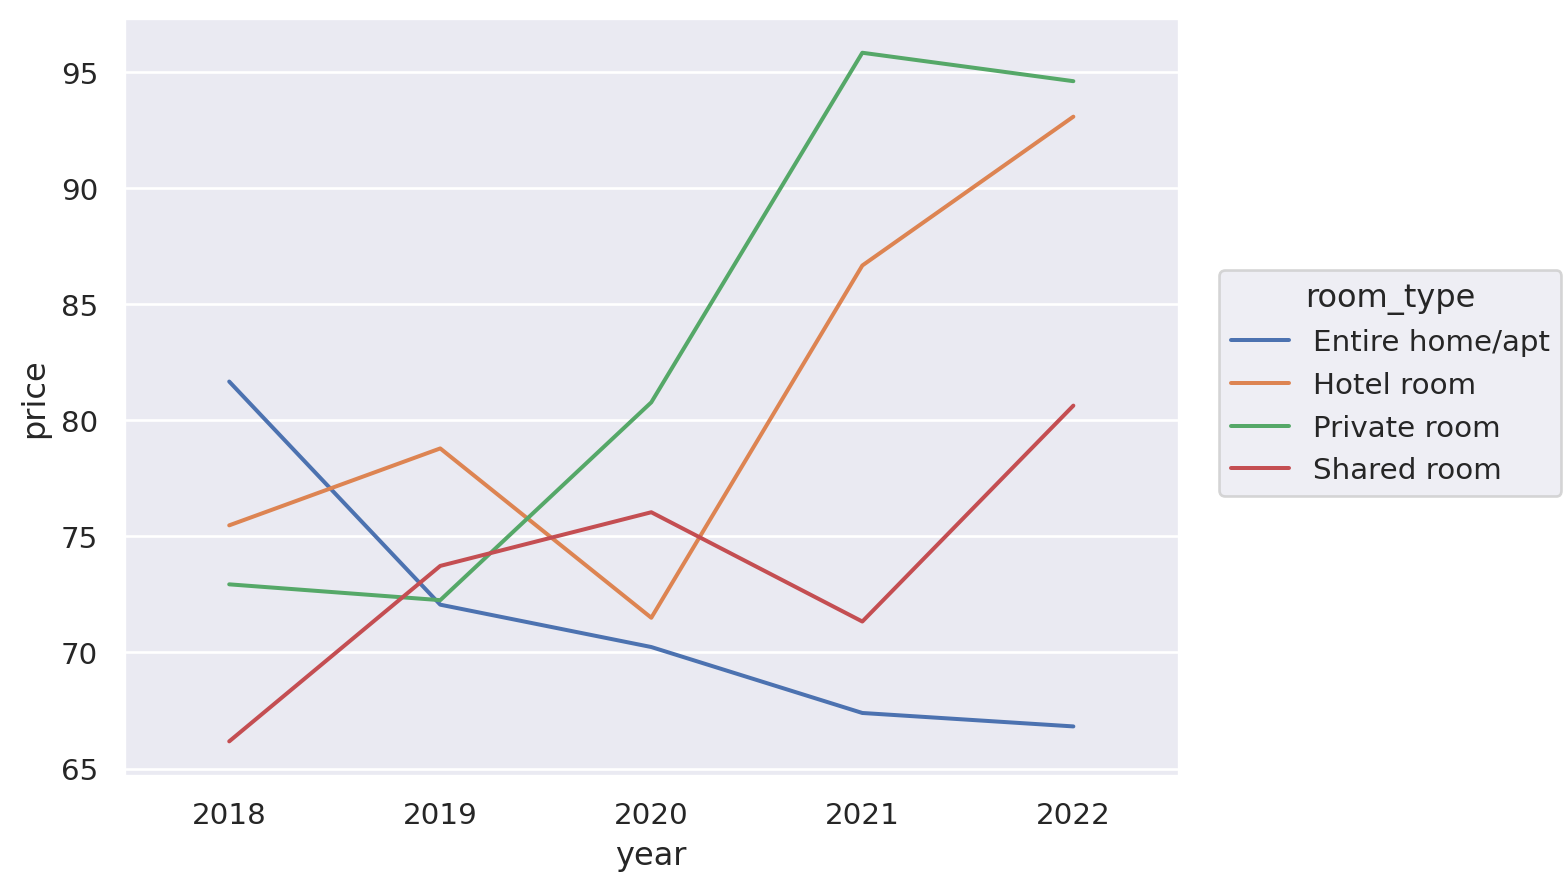

In [16]:
#trend Harga Berdasarkan Type
so.Plot(df_group, x="year", y="price", color='room_type').add(so.Line())

In [18]:

#Trend Per Region dan per type room
quantile_low = df['price'].quantile(0.20)
quantile_high = df['price'].quantile(0.80)


df_filtered = df[(df["price"] < quantile_high) & (df["price"] > quantile_low)]
df_filtered.info()
#Seleksi Data
df_filtered['year'] = df['date'].dt.to_period('Y')
df_filtered = df_filtered[['neighbourhood_group','room_type','price', 'year']]
df_filtered.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28379 entries, 2371 to 1221
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   28379 non-null  int64         
 1   date                 28379 non-null  datetime64[ns]
 2   name                 28379 non-null  object        
 3   host_id              28379 non-null  int64         
 4   host_name            28379 non-null  object        
 5   neighbourhood        28379 non-null  object        
 6   latitude             28379 non-null  float64       
 7   longitude            28379 non-null  float64       
 8   room_type            28379 non-null  object        
 9   price                28379 non-null  int64         
 10  minimum_nights       28379 non-null  int64         
 11  availability_365     28379 non-null  int64         
 12  neighbourhood_group  28379 non-null  object        
dtypes: datetime64[ns](1), float64

/tmp/ipykernel_10481/1688755877.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df['date'].dt.to_period('Y')


,neighbourhood_group,room_type,price,year
2371,East Region,Private room,60,2018
994,Central Region,Private room,98,2018
6129,Central Region,Private room,64,2018
3892,Central Region,Private room,85,2018
4659,Central Region,Shared room,47,2018


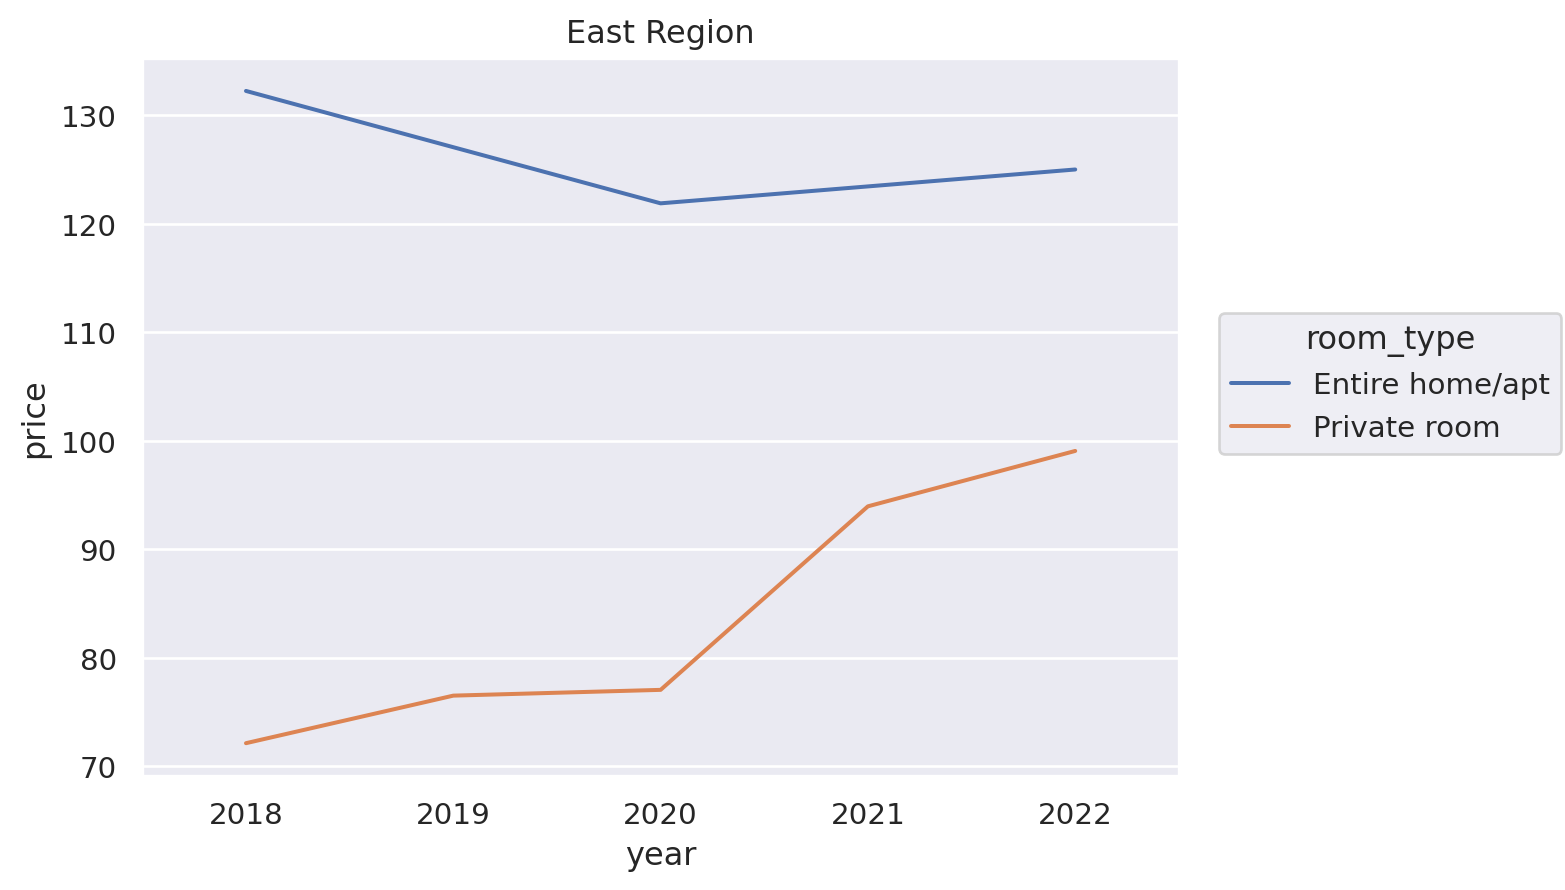

In [19]:
#east Region
east_region = df_filtered.loc[(df_filtered['neighbourhood_group']== 'East Region')][['room_type','price','year']]
east_region = east_region.groupby(by=['year','room_type'],as_index=True).mean().reset_index()
east_region = east_region.sort_values(['year','room_type','price'])
so.Plot(east_region, x="year", y="price", color='room_type').add(so.Line()).label(title='East Region')

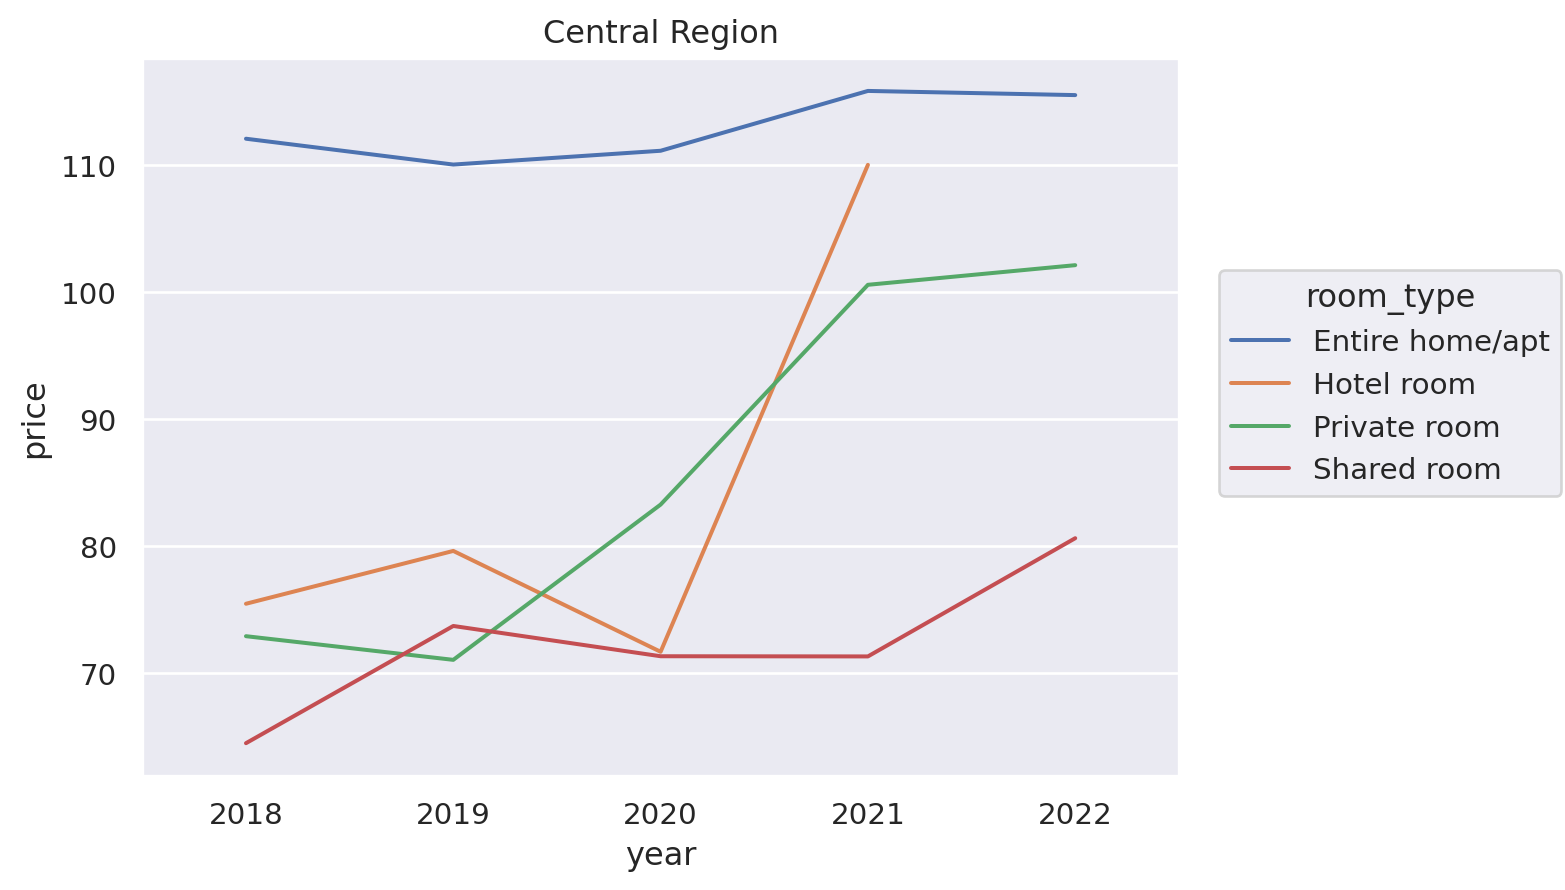

In [20]:
#centar Region
central_region = df_filtered.loc[(df_filtered['neighbourhood_group']== 'Central Region')][['room_type','price','year']]
central_region = central_region.groupby(by=['year','room_type'],as_index=True).mean().reset_index()
central_region = central_region.sort_values(['year','room_type','price'])
so.Plot(central_region, x="year", y="price", color='room_type').add(so.Line()).label(title='Central Region')

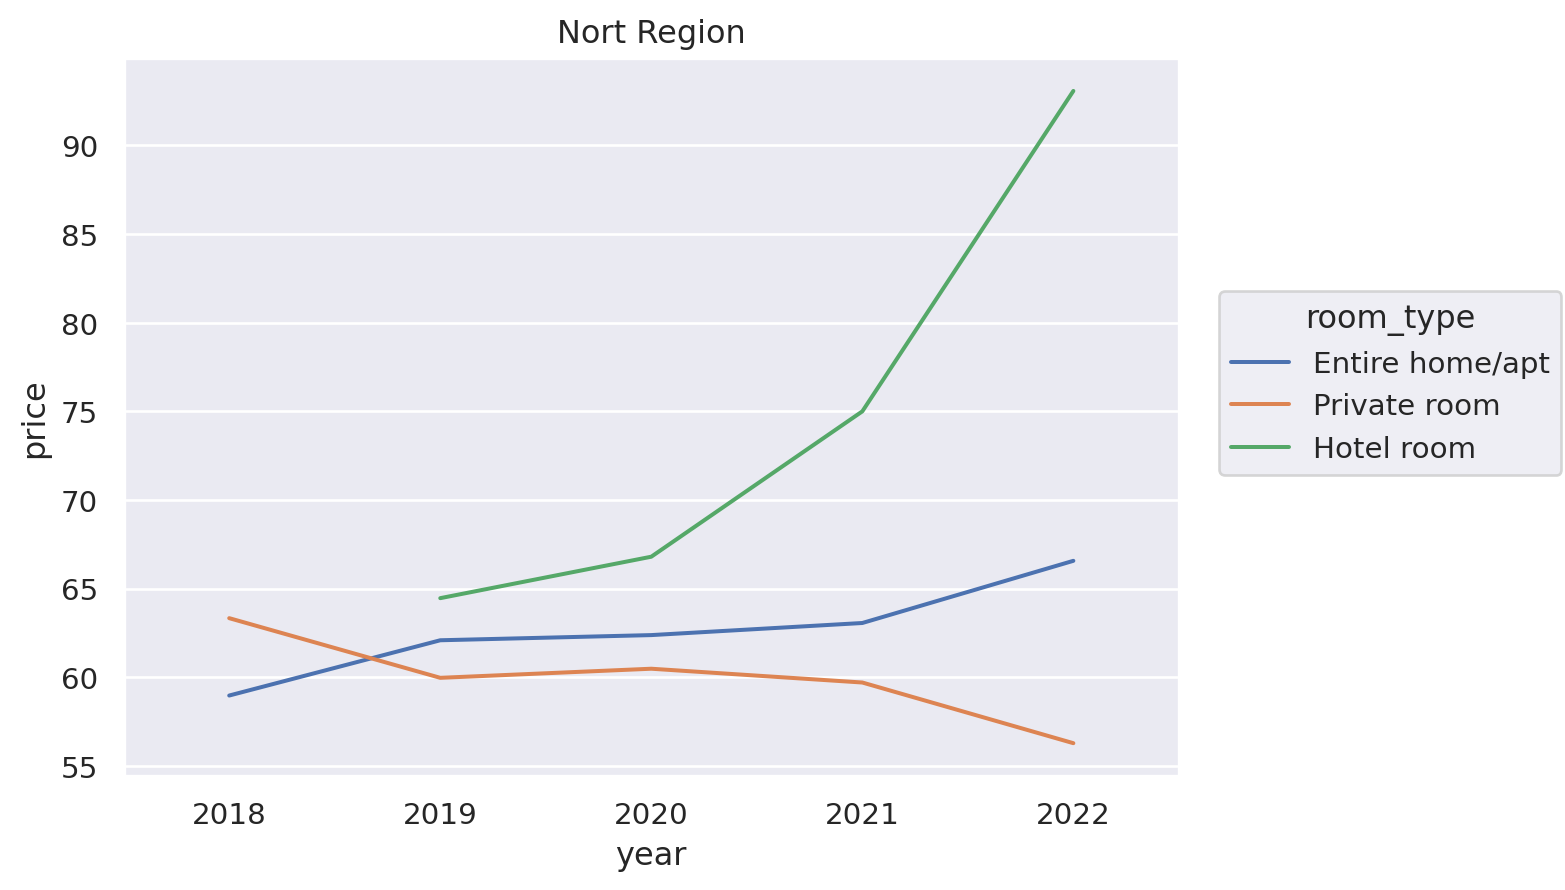

In [21]:
#North Region
nort_region = df_filtered.loc[(df_filtered['neighbourhood_group']== 'North Region')][['room_type','price','year']]
nort_region = nort_region.groupby(by=['year','room_type'],as_index=True).mean().reset_index()
nort_region = nort_region.sort_values(['year','room_type','price'])
so.Plot(nort_region, x="year", y="price", color='room_type').add(so.Line()).label(title='Nort Region')

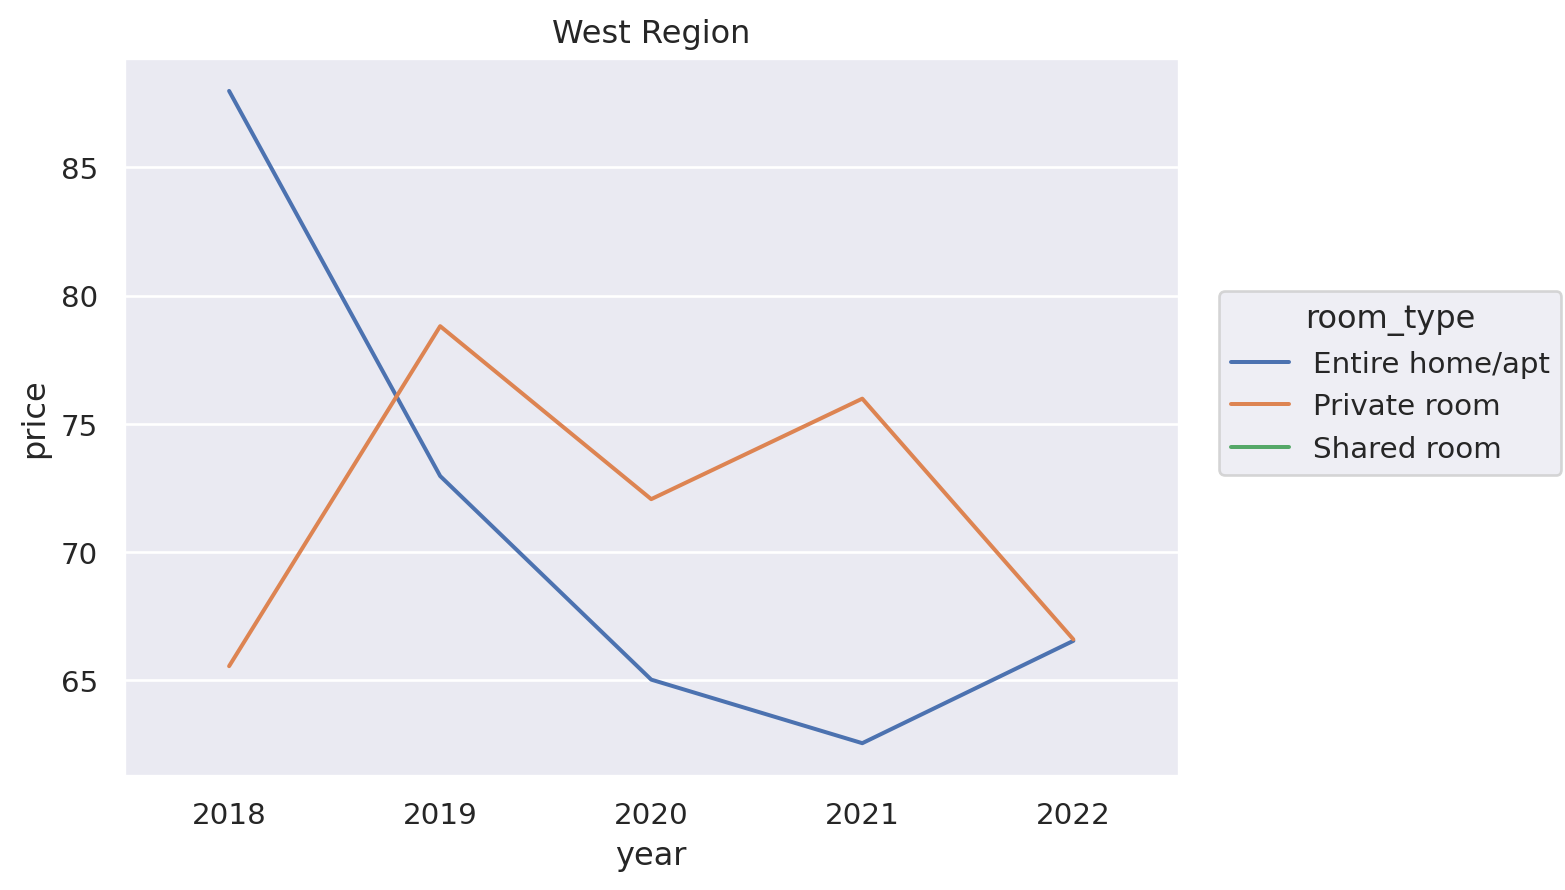

In [22]:
#West Region
west_region = df_filtered.loc[(df_filtered['neighbourhood_group']== 'West Region')][['room_type','price','year']]
west_region = west_region.groupby(by=['year','room_type'],as_index=True).mean().reset_index()
west_region = west_region.sort_values(['year','room_type','price'])
so.Plot(west_region, x="year", y="price", color='room_type').add(so.Line()).label(title='West Region')

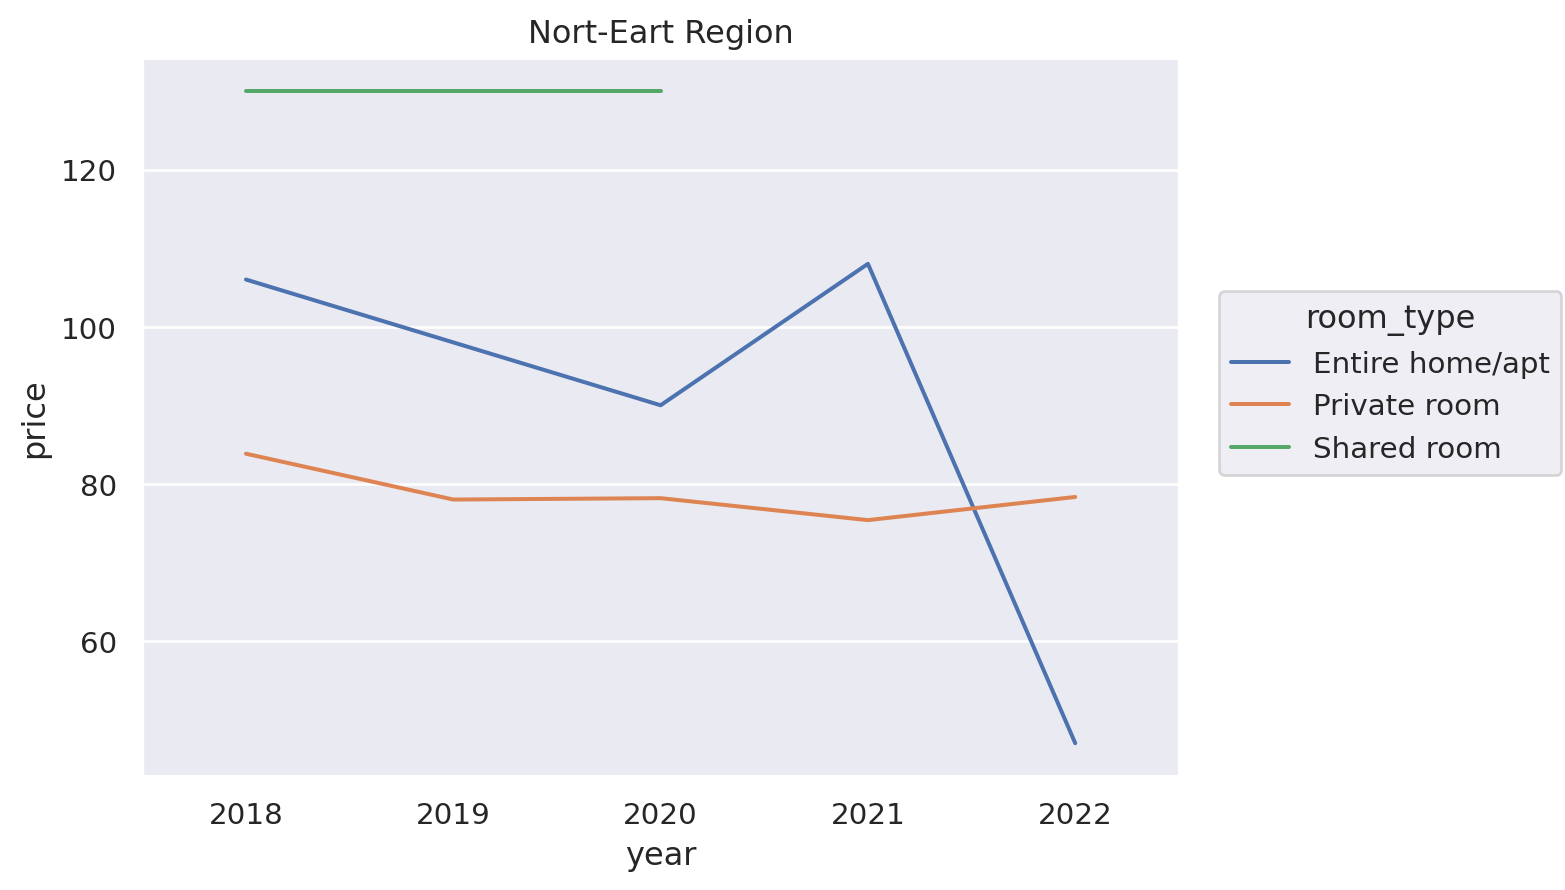

In [23]:
#Nort eart Region
nort_eart_region = df_filtered.loc[(df_filtered['neighbourhood_group']== 'North-East Region')][['room_type','price','year']]
nort_eart_region = nort_eart_region.groupby(by=['year','room_type'],as_index=True).mean().reset_index()
nort_eart_region = nort_eart_region.sort_values(['year','room_type','price'])
so.Plot(nort_eart_region, x="year", y="price", color='room_type').add(so.Line()).label(title='Nort-Eart Region')
